In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Import all data

In [2]:
X_train = pd.read_parquet("X/X_train.parquet")
X_test = pd.read_parquet("X/X_test.parquet")
Y_train = pd.read_parquet("Y/Y_train.parquet")
Y_test = pd.read_parquet("Y/Y_test.parquet")
X_train = X_train[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']]
X_test = X_test[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']]
Complete = pd.read_parquet("dataset.parquet")

In [3]:
scalerX = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scalerX.transform(X_train))
X_test = pd.DataFrame(scalerX.transform(X_test))
scalerY = MinMaxScaler().fit(Y_train)
Y_train = pd.DataFrame(scalerY.transform(Y_train))
Y_test = pd.DataFrame(scalerY.transform(Y_test))
Y1_train = Y_train[[0]]
Y1_test = Y_test[[0]]
Y2_train = Y_train[[1]]
Y2_test = Y_test[[1]]
Y3_train = Y_train[[2]]
Y3_test = Y_test[[2]]
Y4_train = Y_train[[3]]
Y4_test = Y_test[[3]]
Y5_train = Y_train[[4]]
Y5_test = Y_test[[4]]
Y6_train = Y_train[[5]]
Y6_test = Y_test[[5]]

## Train and score

In [4]:
parameters = {'kernel': [RationalQuadratic() + WhiteKernel(), DotProduct() + WhiteKernel(),
                         DotProduct() + RationalQuadratic(), RBF() + WhiteKernel(),
                         RBF() + DotProduct(), RBF() + RationalQuadratic()]} 

In [5]:
def GridSearch(rf, X_train, X_test, y_train, y_test, grid, verbose=False):
    best_score = 0
    par = ParameterGrid(grid)
    ln = len(par)
    i = 0
    for g in par:
        if(verbose):
            print(f"Probando: {g}, {i} de {ln}")
        i+=1
        rf.set_params(**g)
        startTime = time.time()
        rf.fit(X_train, np.ravel(y_train))
        elapsedTime = time.time() - startTime
        score = rf.score(X_test, y_test)
        if(verbose):
            print(f"Tiempo de entrenamiento: {elapsedTime} s, score: {score}")
        # save if best
        if score > best_score:
            best_score = score
            best_grid = g
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_grid}")
    return best_grid

In [ ]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y1_train, Y1_test, parameters, verbose=True)
clf1 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y1_train))

Probando: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}, 0 de 6
Tiempo de entrenamiento: 9.677557468414307 s, score: 0.9785857476463445
Probando: {'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)}, 1 de 6
Tiempo de entrenamiento: 5.279538154602051 s, score: 0.9057464381878501
Probando: {'kernel': DotProduct(sigma_0=1) + RationalQuadratic(alpha=1, length_scale=1)}, 2 de 6
Tiempo de entrenamiento: 12.187608480453491 s, score: 0.9482533234646155
Probando: {'kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}, 3 de 6
Tiempo de entrenamiento: 3.9436540603637695 s, score: 0.970769566869085
Probando: {'kernel': RBF(length_scale=1) + DotProduct(sigma_0=1)}, 4 de 6
Tiempo de entrenamiento: 0.6013932228088379 s, score: -155.95782272239964
Probando: {'kernel': RBF(length_scale=1) + RationalQuadratic(alpha=1, length_scale=1)}, 5 de 6
Tiempo de entrenamiento: 28.068222999572754 s, score: 0.9727727495264535
Best Score: 0.9785857476463445
Best 

In [ ]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y2_train, Y2_test, parameters, verbose=True)
clf2 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y2_train))

In [ ]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y3_train, Y3_test, parameters, verbose=True)
clf3 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y3_train))

In [ ]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y4_train, Y4_test, parameters, verbose=True)
clf4 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y4_train))

In [ ]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y5_train, Y5_test, parameters, verbose=True)
clf5 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y5_train))

In [6]:
g = GridSearch(GaussianProcessRegressor(), X_train, X_test, Y6_train, Y6_test, parameters, verbose=True)
clf6 = GaussianProcessRegressor(**g).fit(X_train, np.ravel(Y6_train))

Probando: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}, 0 de 6
Tiempo de entrenamiento: 8.537360668182373 s, score: 0.9792527138333394
Probando: {'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)}, 1 de 6
Tiempo de entrenamiento: 4.075574159622192 s, score: 0.7846137644266227
Probando: {'kernel': DotProduct(sigma_0=1) + RationalQuadratic(alpha=1, length_scale=1)}, 2 de 6
Tiempo de entrenamiento: 1.056929349899292 s, score: -508.2716871737393
Probando: {'kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}, 3 de 6
Tiempo de entrenamiento: 2.6075284481048584 s, score: 0.9714887393022418
Probando: {'kernel': RBF(length_scale=1) + DotProduct(sigma_0=1)}, 4 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 20.07024884223938 s, score: 0.7513854633231474
Probando: {'kernel': RBF(length_scale=1) + RationalQuadratic(alpha=1, length_scale=1)}, 5 de 6


/home/oscar/TFGInf/.venv/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tiempo de entrenamiento: 60.78548288345337 s, score: 0.975633652481492
Best Score: 0.9792527138333394
Best Parameters: {'kernel': RationalQuadratic(alpha=1, length_scale=1) + WhiteKernel(noise_level=1)}


## Test for each year

In [ ]:
np.abs(clf1.predict(X_test.iloc[0::4]) - np.array(Y1_test.iloc[0::4][0])).mean()

In [ ]:
np.abs(clf1.predict(X_test.iloc[1::4]) - np.array(Y1_test.iloc[1::4][0])).mean()

In [ ]:
np.abs(clf1.predict(X_test.iloc[2::4]) - np.array(Y1_test.iloc[2::4][0])).mean()

In [ ]:
np.abs(clf1.predict(X_test.iloc[3::4]) - np.array(Y1_test.iloc[3::4][0])).mean()

## One concrete example

In [ ]:
i = 120
scalerY.inverse_transform([[clf1.predict([X_test.iloc[i]])[0], clf2.predict([X_test.iloc[i]])[0], clf3.predict([X_test.iloc[i]])[0], 
                          clf4.predict([X_test.iloc[i]])[0], clf5.predict([X_test.iloc[i]])[0], clf6.predict([X_test.iloc[i]])[0], 0]])

In [ ]:
scalerY.inverse_transform([Y_test.iloc[i]])

## Probamos con España

In [7]:
country = 'ESP'
esp = Complete[Complete.COU == country]

### Municipal

In [ ]:
years = list(esp.Year)
mun = list(esp.Municipal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[0] for a in scalerY.inverse_transform([[a,0,0,0,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura municipal en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Household

In [ ]:
years = list(esp.Year)
mun = list(esp.Household)
predictions = clf2.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[1] for a in scalerY.inverse_transform([[0,a,0,0,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura doméstica en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recovered

In [ ]:
years = list(esp.Year)
mun = list(esp.Recovered)
predictions = clf3.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[2] for a in scalerY.inverse_transform([[0,0,a,0,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura recuperada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recicled

In [ ]:
years = list(esp.Year)
mun = list(esp.Recicled)
predictions = clf4.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[3] for a in scalerY.inverse_transform([[0,0,0,a,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura reciclada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Compost

In [ ]:
years = list(esp.Year)
mun = list(esp.Compost)
predictions = clf5.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[4] for a in scalerY.inverse_transform([[0,0,0,0,a,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura compostada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Disposal

In [8]:
years = list(esp.Year)
mun = list(esp.Disposal)
predictions = clf6.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[5] for a in scalerY.inverse_transform([[0,0,0,0,0,a,0] for a in predictions])]

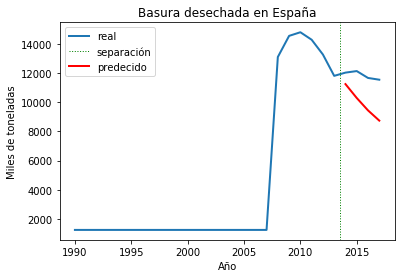

In [9]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura desechada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()